In this notebook we will test the table selection module

In [1]:
# IMPORTs
from utils.task import Task
import json
import os
from src.pipeline.table_selection import table_selection
from utils.database_utils.db_info import get_db_schema
from tqdm import tqdm
from dotenv import load_dotenv
from utils.sql_query_parsers import get_sql_columns_dict
import matplotlib.pyplot as plt
import numpy as np
from utils.prompt import load_prompt
import tiktoken
load_dotenv()

True

In [2]:
# Function to load JSON data
def load_json_data(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data


# Function to create task object
def create_task(example):
    return Task(example)

In [3]:
# load the task data
filepath = "C:/Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\data/test/subsampled_test.json"
data = load_json_data(filepath)
# load the retrieved entities
filepath_entities = "C:/Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\data/test/retrieved_entities.json"
retrieved_entities = load_json_data(filepath_entities)
# load the retrieved context
filepath_context = "C:/Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\data/test/retrieved_context.json"
retrieved_context = load_json_data(filepath_context)

In [4]:
# test column selection module with a random sample
index = 11
example = data[index]
task = create_task(example)

#get the database schema
dp_path = os.getenv("DB_ROOT_PATH") + f"/{task.db_id}/{task.db_id}.sqlite"
schema = get_db_schema(dp_path)
model = "llama-3"
ans = table_selection(task=task, retrieved_entities=retrieved_entities[index],
                      retrieved_context=retrieved_context[index], tentative_schema=schema, model=model, num_samples=1)
ans

You are an SQL expert and very smart data analyst.
Your task is to analyze the provided database schema, comprehend the posed question, and leverage the hint to identify which tables are needed to generate a SQL query for answering the question.

Database Schema Overview:
CREATE TABLE frpm
(
	CDSCode TEXT not null primary key,
	`Academic Year` TEXT null, --
	`County Code` TEXT null, --
	`District Code` INTEGER null, --
	`School Code` TEXT null, --
	`County Name` TEXT null, --
	`District Name` TEXT null, --
	`School Name` TEXT null, -- examples: `California Middle`| description: School Name
	`District Type` TEXT null, --
	`School Type` TEXT null, --
	`Educational Option Type` TEXT null, --
	`NSLP Provision Status` TEXT null, --
	`Charter School (Y/N)` INTEGER null, --
	`Charter School Number` TEXT null, --
	`Charter Funding Type` TEXT null, --
	IRC INTEGER null, --
	`Low Grade` TEXT null, --
	`High Grade` TEXT null, --
	`Enrollment (K-12)` REAL null, --
	`Free Meal Count (K-12)` REAL nu

{'tentative_schema': {'schools': ['CDSCode',
   'NCESDist',
   'NCESSchool',
   'StatusType',
   'County',
   'District',
   'School',
   'Street',
   'StreetAbr',
   'City',
   'Zip',
   'State',
   'MailStreet',
   'MailStrAbr',
   'MailCity',
   'MailZip',
   'MailState',
   'Phone',
   'Ext',
   'Website',
   'OpenDate',
   'ClosedDate',
   'Charter',
   'CharterNum',
   'FundingType',
   'DOC',
   'DOCType',
   'SOC',
   'SOCType',
   'EdOpsCode',
   'EdOpsName',
   'EILCode',
   'EILName',
   'GSoffered',
   'GSserved',
   'Virtual',
   'Magnet',
   'Latitude',
   'Longitude',
   'AdmFName1',
   'AdmLName1',
   'AdmEmail1',
   'AdmFName2',
   'AdmLName2',
   'AdmEmail2',
   'AdmFName3',
   'AdmLName3',
   'AdmEmail3',
   'LastUpdate'],
  'frpm': ['CDSCode',
   'Academic Year',
   'County Code',
   'District Code',
   'School Code',
   'County Name',
   'District Name',
   'School Name',
   'District Type',
   'School Type',
   'Educational Option Type',
   'NSLP Provision Status'

In [16]:
#test context retrieval module with the subsampled test and with the base schema of database
model = "gpt-4"
num_samples = 1
res = []
for index, sample in tqdm(enumerate(data)):
    task = create_task(sample)
    dp_path = os.getenv("DB_ROOT_PATH") + f"/{task.db_id}/{task.db_id}.sqlite"
    schema = get_db_schema(dp_path)

    ans = table_selection(task=task, retrieved_entities=retrieved_entities[index],
                          retrieved_context=retrieved_context[index], tentative_schema=schema, model=model,
                          num_samples=num_samples)
    res.append(ans)
    print(str(index) + " : ", ans)

1it [00:08,  8.58s/it]

0 :  {'tentative_schema': {'atom': ['atom_id', 'molecule_id', 'element'], 'bond': ['bond_id', 'molecule_id', 'bond_type']}, 'chain_of_thought_reasoning': "To answer the question about listing atom IDs that belong to the molecule 'TR346' and determining the number of different bond types that can be created by this molecule, we need to access specific tables. First, the 'atom' table is necessary to identify atoms that belong to the molecule 'TR346', as it contains the 'molecule_id' linking atoms to their respective molecules. Next, the 'bond' table is required to determine the types of bonds associated with 'TR346', as it includes both 'molecule_id' and 'bond_type', which allows us to count distinct bond types within this molecule. These two tables provide the direct information needed to answer the question, linking molecule identity to its atoms and the types of bonds it can form.", 'selected_tables': ['atom', 'bond']}


2it [00:24, 12.87s/it]

1 :  {'tentative_schema': {'schools': ['CDSCode', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District', 'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Phone', 'Ext', 'Website', 'OpenDate', 'ClosedDate', 'Charter', 'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual', 'Magnet', 'Latitude', 'Longitude', 'AdmFName1', 'AdmLName1', 'AdmEmail1', 'AdmFName2', 'AdmLName2', 'AdmEmail2', 'AdmFName3', 'AdmLName3', 'AdmEmail3', 'LastUpdate'], 'frpm': ['CDSCode', 'Academic Year', 'County Code', 'District Code', 'School Code', 'County Name', 'District Name', 'School Name', 'District Type', 'School Type', 'Educational Option Type', 'NSLP Provision Status', 'Charter School (Y/N)', 'Charter School Number', 'Charter Funding Type', 'IRC', 'Low Grade', 'High Grade', 'Enrollment (K-12)', 'Free Meal Count (K-12)', 'Percent (%) Eligi

3it [00:33, 11.25s/it]

2 :  {'tentative_schema': {'superhero': ['id', 'superhero_name', 'full_name', 'gender_id', 'eye_colour_id', 'hair_colour_id', 'skin_colour_id', 'race_id', 'publisher_id', 'alignment_id', 'height_cm', 'weight_kg'], 'publisher': ['id', 'publisher_name']}, 'chain_of_thought_reasoning': "To find the tallest hero published by Marvel Comics, we need to identify the hero with the maximum height from the publisher 'Marvel Comics'. First, we need the 'superhero' table because it contains the hero's height and publisher information through foreign keys. The 'height_cm' column in the 'superhero' table is essential to determine the tallest hero. Next, the 'publisher' table is required because it contains the publisher names, and we need to filter heroes based on the publisher 'Marvel Comics'. The 'publisher_id' in the 'superhero' table links to the 'id' in the 'publisher' table, allowing us to match superheroes with their publishers. These two tables provide all necessary information to answer the

4it [00:45, 11.60s/it]

3 :  {'tentative_schema': {'badges': ['Id', 'UserId', 'Name', 'Date'], 'users': ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId', 'Age', 'ProfileImageUrl']}, 'chain_of_thought_reasoning': "To determine how many elders obtained the 'Supporter' badge, we need to identify users who are over 65 years old and have received this specific badge. The 'badges' table is essential because it contains records of all badges awarded, including the badge name and the associated user. The 'users' table is necessary to filter these users by age, specifically those who are elders (Age > 65). By joining these two tables on the UserId, we can filter for the 'Supporter' badge and count the number of unique elder users who have received it.", 'selected_tables': ['badges', 'users']}


5it [00:57, 11.65s/it]

4 :  {'tentative_schema': {'users': ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId', 'Age', 'ProfileImageUrl'], 'badges': ['Id', 'UserId', 'Name', 'Date']}, 'chain_of_thought_reasoning': "To determine how many users from New York have both a 'Teacher' and 'Supporter' badge, we need to identify users based on their location and the badges they possess. The 'users' table is necessary to filter users by their location ('New York'). The 'badges' table is required to check the badges ('Teacher' and 'Supporter') associated with these users. We need to join these tables on the 'UserId' to correlate the users with their badges. The query will involve filtering the 'users' table for those located in New York, then checking the 'badges' table for entries with 'Teacher' and 'Supporter' badges for these users, ensuring that each user has both badges.", 'selected_tables': ['users', 'badges']}


6it [01:13, 13.17s/it]

5 :  {'tentative_schema': {'cards': ['id', 'artist', 'asciiName', 'availability', 'borderColor', 'cardKingdomFoilId', 'cardKingdomId', 'colorIdentity', 'colorIndicator', 'colors', 'convertedManaCost', 'duelDeck', 'edhrecRank', 'faceConvertedManaCost', 'faceName', 'flavorName', 'flavorText', 'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit', 'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative', 'isFullArt', 'isOnlineOnly', 'isOversized', 'isPromo', 'isReprint', 'isReserved', 'isStarter', 'isStorySpotlight', 'isTextless', 'isTimeshifted', 'keywords', 'layout', 'leadershipSkills', 'life', 'loyalty', 'manaCost', 'mcmId', 'mcmMetaId', 'mtgArenaId', 'mtgjsonV4Id', 'mtgoFoilId', 'mtgoId', 'multiverseId', 'name', 'number', 'originalReleaseDate', 'originalText', 'originalType', 'otherFaceIds', 'power', 'printings', 'promoTypes', 'purchaseUrls', 'rarity', 'scryfallId', 'scryfallIllustrationId', 'scryfallOracleId', 'setCode', 'side', 'subtypes', 'supertypes', 'tcgplayerPr

7it [01:27, 13.36s/it]

6 :  {'tentative_schema': {'molecule': ['molecule_id', 'label'], 'bond': ['bond_id', 'molecule_id', 'bond_type']}, 'chain_of_thought_reasoning': "To answer the question regarding the number of double bonds in molecule TR006 and whether it is carcinogenic, we need to access specific information from the database. First, we need to identify the molecule's carcinogenic status, which is stored in the 'label' column of the 'molecule' table. This table will allow us to filter the molecule by its ID ('TR006') and determine its carcinogenic status. Secondly, to count the number of double bonds in TR006, we need to access the 'bond' table where bonds are associated with molecules through the 'molecule_id' column. The type of bond, specifically double bonds, is indicated in the 'bond_type' column. By filtering bonds of TR006 and counting those with a bond type of '=', we can determine the number of double bonds. Therefore, the 'molecule' and 'bond' tables are necessary for constructing the SQL q

8it [01:42, 13.94s/it]

7 :  {'tentative_schema': {'member': ['member_id', 'first_name', 'last_name', 'email', 'position', 't_shirt_size', 'phone', 'zip', 'link_to_major'], 'major': ['major_id', 'major_name', 'department', 'college']}, 'chain_of_thought_reasoning': "To answer the question about the full name and college of the club member with the position of 'Secretary', we need to extract information from multiple tables. First, the 'member' table is essential as it contains the member's first name, last name, and position, which are necessary to identify the member with the position of 'Secretary' and to construct their full name. Additionally, the 'member' table contains a link to the 'major' table through the 'link_to_major' column. The 'major' table is required because it includes the 'college' information, which is part of the question. By joining these two tables on the 'major_id' (from 'major') and 'link_to_major' (from 'member'), we can retrieve the college information for the specified member.", 's

9it [01:54, 13.16s/it]

8 :  {'tentative_schema': {'bond': ['bond_id', 'molecule_id', 'bond_type'], 'molecule': ['molecule_id', 'label']}, 'chain_of_thought_reasoning': "To determine the percentage of compounds that form a triple bond, we need to identify molecules that have at least one triple bond. The 'bond' table is essential because it contains information about the type of bonds (including triple bonds, as indicated by bond_type = '#'). However, to relate these bonds to specific molecules, we also need the 'molecule' table, which contains the identifiers and labels for each molecule. The 'bond' table links to the 'molecule' table via the 'molecule_id', allowing us to count and categorize bonds by molecule. Thus, both the 'bond' and 'molecule' tables are necessary to perform the calculation of the percentage of molecules with at least one triple bond.", 'selected_tables': ['bond', 'molecule']}


10it [02:06, 12.95s/it]

9 :  {'tentative_schema': {'Player': ['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight'], 'Player_Attributes': ['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']}, 'chain_of_thought_reasoning': "To determine the potential of Francesco Parravicini on a specific date, we need to identify the player's unique identifiers and then use these to fetch the relevant attributes from the player attr

11it [02:19, 13.07s/it]

10 :  {'tentative_schema': {'client': ['client_id', 'gender', 'birth_date', 'district_id'], 'district': ['district_id', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']}, 'chain_of_thought_reasoning': "To answer the question about the number of male customers living in North Bohemia with an average salary greater than 8000, we need to connect several pieces of information spread across multiple tables. First, we need to identify the gender of the clients and their district of residence, which requires the 'client' table. The 'client' table links clients to districts via the 'district_id'. Next, we need the 'district' table to filter clients based on the region (North Bohemia) and to check if the average salary in those districts is greater than 8000. The 'district' table contains the region name (A3) and average salary (A11) which are crucial for these filters. Therefore, the necessary tables are 'client' for client demographics and 'dist

12it [02:28, 11.73s/it]

11 :  {'tentative_schema': {'schools': ['CDSCode', 'NCESDist', 'NCESSchool', 'StatusType', 'County', 'District', 'School', 'Street', 'StreetAbr', 'City', 'Zip', 'State', 'MailStreet', 'MailStrAbr', 'MailCity', 'MailZip', 'MailState', 'Phone', 'Ext', 'Website', 'OpenDate', 'ClosedDate', 'Charter', 'CharterNum', 'FundingType', 'DOC', 'DOCType', 'SOC', 'SOCType', 'EdOpsCode', 'EdOpsName', 'EILCode', 'EILName', 'GSoffered', 'GSserved', 'Virtual', 'Magnet', 'Latitude', 'Longitude', 'AdmFName1', 'AdmLName1', 'AdmEmail1', 'AdmFName2', 'AdmLName2', 'AdmEmail2', 'AdmFName3', 'AdmLName3', 'AdmEmail3', 'LastUpdate'], 'frpm': ['School Name', 'CDSCode']}, 'chain_of_thought_reasoning': "To answer the question about the school in California with the lowest latitude coordinates, its city, and its lowest grade, we need to focus on the 'schools' table. This table contains all necessary information: the 'State' column to filter schools in California ('CA'), the 'Latitude' column to find the school with t

13it [02:37, 10.81s/it]

12 :  {'tentative_schema': {'bond': ['bond_id', 'molecule_id', 'bond_type']}, 'chain_of_thought_reasoning': "To determine the percentage of double bonds in molecule TR047, we need to analyze the bonds associated with this molecule. The 'bond' table contains the necessary information about each bond's type and the molecule it belongs to. Specifically, the 'bond_type' column will allow us to filter for double bonds ('='), and the 'molecule_id' column will enable us to focus on bonds within the TR047 molecule. The calculation of the percentage requires counting the total number of bonds and the number of double bonds for TR047, both of which can be derived from the 'bond' table alone. Therefore, only the 'bond' table is necessary for this query as it provides both the bond type and the molecule association needed to compute the desired percentage.", 'selected_tables': ['bond']}


14it [02:57, 13.63s/it]

13 :  {'tentative_schema': {'votes': ['Id', 'PostId', 'VoteTypeId', 'CreationDate', 'UserId', 'BountyAmount'], 'posts': ['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreaionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId', 'LasActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount', 'LastEditorUserId', 'LastEditDate', 'CommunityOwnedDate', 'ParentId', 'ClosedDate', 'OwnerDisplayName', 'LastEditorDisplayName'], 'users': ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId', 'Age', 'ProfileImageUrl']}, 'chain_of_thought_reasoning': "To answer the question about which user added a bounty amount of 50 to a post mentioning 'variance', we need to connect information about the bounty, the post, and the user. First, the 'votes' table is necessary because it contains the 'BountyAmount' and links to both the post and the user via 'PostId' and 'UserId'. We need to filter this tab

15it [03:12, 12.81s/it]

14 :  {'tentative_schema': {'users': ['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate', 'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId', 'Age', 'ProfileImageUrl'], 'badges': ['Id', 'UserId', 'Name', 'Date']}, 'chain_of_thought_reasoning': "To answer the question about listing the dates when users located in 'Rochester, NY' obtained their badges, we need to connect information about users and their badges. First, we need the 'users' table to identify users based on their location ('Rochester, NY'). The 'Location' column in the 'users' table allows us to filter users by this specific location. Once we have identified these users, we need to find out when they obtained their badges. This information is stored in the 'badges' table, where each badge is linked to a user via the 'UserId' column and includes the date the badge was obtained in the 'Date' column. Therefore, by joining these two tables on the 'UserId' column, we can retrieve t

In [17]:
from pathlib import Path

schema_path = Path('C:/Users/yousf/Bureau/ConvergenceAI/CHESS_Impl/data/test/tentative_schema.json')
with open(schema_path, 'w') as f:
    json.dump(res, f, indent=4)

# Metrics

In [9]:
def calculate_precision_recall_f1(tp, fp, fn):
    """
    Calculate precision, recall, and F1 score.
    
    Args:
        tp (int): Number of true positives.
        fp (int): Number of false positives.
        fn (int): Number of false negatives.
    
    Returns:
        Tuple[float, float, float]: Precision, recall, and F1 score.
    """
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1


def evaluate_schema(ground_truth, predicted):
    """
    Evaluate the schema prediction against the ground truth.
    
    Args:
        ground_truth (Dict[str, List[str]]): Ground truth schema with tables and their columns.
        predicted (Dict[str, List[str]]): Predicted schema with tables and their columns.
    
    Returns:
        Dict[str, Dict[str, float]]: Evaluation results for tables and columns.
    """

    # Transform all table and column names to lowercase
    ground_truth = {table.lower(): [col.lower() for col in columns] for table, columns in ground_truth.items()}
    predicted = {table.lower(): [col.lower() for col in columns] for table, columns in predicted.items()}

    # Evaluate tables
    gt_tables = set(ground_truth.keys())
    pred_tables = set(predicted.keys())

    tp_tables = len(gt_tables.intersection(pred_tables))
    fp_tables = len(pred_tables.difference(gt_tables))
    fn_tables = len(gt_tables.difference(pred_tables))

    table_precision, table_recall, table_f1 = calculate_precision_recall_f1(tp_tables, fp_tables, fn_tables)

    # Evaluate columns
    tp_columns = 0
    fp_columns = 0
    fn_columns = 0

    for table in gt_tables:
        gt_columns = set(ground_truth[table])
        pred_columns = set(predicted.get(table, []))

        tp_columns += len(gt_columns.intersection(pred_columns))
        fp_columns += len(pred_columns.difference(gt_columns))
        fn_columns += len(gt_columns.difference(pred_columns))

    column_precision, column_recall, column_f1 = calculate_precision_recall_f1(tp_columns, fp_columns, fn_columns)

    return {
        "table_metrics": {
            "precision": table_precision,
            "recall": table_recall,
            "f1": table_f1
        },
        "column_metrics": {
            "precision": column_precision,
            "recall": column_recall,
            "f1": column_f1
        }
    }


def aggregate_metrics(evals):
    """
    Aggregate precision, recall, and F1 scores from multiple evaluations.
    
    Args:
        evals (List[Dict[str, Dict[str, float]]]): List of evaluation results.
    
    Returns:
        Dict[str, float]: Aggregated precision, recall, and F1 score.
    """
    table_precision = np.mean([evaluation['table_metrics']['precision'] for evaluation in evals])
    table_recall = np.mean([evaluation['table_metrics']['recall'] for evaluation in evals])
    table_f1 = np.mean([evaluation['table_metrics']['f1'] for evaluation in evals])

    column_precision = np.mean([evaluation['column_metrics']['precision'] for evaluation in evals])
    column_recall = np.mean([evaluation['column_metrics']['recall'] for evaluation in evals])
    column_f1 = np.mean([evaluation['column_metrics']['f1'] for evaluation in evals])

    return {
        "table_metrics": {
            "precision": table_precision,
            "recall": table_recall,
            "f1": table_f1
        },
        "column_metrics": {
            "precision": column_precision,
            "recall": column_recall,
            "f1": column_f1
        }
    }


def plot_metrics(metrics):
    """
    Plot precision, recall, and F1 score.
    
    Args:
        metrics (Dict[str, Dict[str, float]]): Aggregated metrics.
    """
    categories = ['Tables', 'Columns']

    precision_values = [
        metrics['table_metrics']['precision'],
        metrics['column_metrics']['precision']
    ]

    recall_values = [
        metrics['table_metrics']['recall'],
        metrics['column_metrics']['recall']
    ]

    f1_values = [
        metrics['table_metrics']['f1'],
        metrics['column_metrics']['f1']
    ]

    x = np.arange(len(categories))
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width, precision_values, width, label='Precision')
    rects2 = ax.bar(x, recall_values, width, label='Recall')
    rects3 = ax.bar(x + width, f1_values, width, label='F1 Score')

    ax.set_ylabel('Scores')
    ax.set_title('Average Precision, Recall, and F1 Score for Tables and Columns')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()
    plt.ylim(0, 1)  # Set y-axis range from 0 to 1
    plt.show()


In [10]:
def make_test(data, model, num_samples):
    res = []
    for index, sample in tqdm(enumerate(data)):
        task = create_task(sample)
        dp_path = os.getenv("DB_ROOT_PATH") + f"/{task.db_id}/{task.db_id}.sqlite"
        schema = get_db_schema(dp_path)

        ans = table_selection(task=task, retrieved_entities=retrieved_entities[index],
                              retrieved_context=retrieved_context[index], tentative_schema=schema, model=model,
                              num_samples=num_samples)
        res.append(ans)

    evals = []
    for i, schema in enumerate(res):
        pred = schema["tentative_schema"]
        task = create_task(data[i])
        db_path = os.getenv("DB_ROOT_PATH") + f"/{task.db_id}/{task.db_id}.sqlite"
        gt = get_sql_columns_dict(db_path, task.SQL)
        evaluation = evaluate_schema(gt, pred)
        evals.append(evaluation)

    aggregated_metrics = aggregate_metrics(evals)
    print("Aggregated Metrics:", aggregated_metrics)

    plot_metrics(aggregated_metrics)

15it [02:33, 10.26s/it]


Aggregated Metrics: {'table_metrics': {'precision': 0.9444444444444444, 'recall': 1.0, 'f1': 0.9644444444444444}, 'column_metrics': {'precision': 0.3812335073700107, 'recall': 0.9904761904761905, 'f1': 0.4899229616775066}}


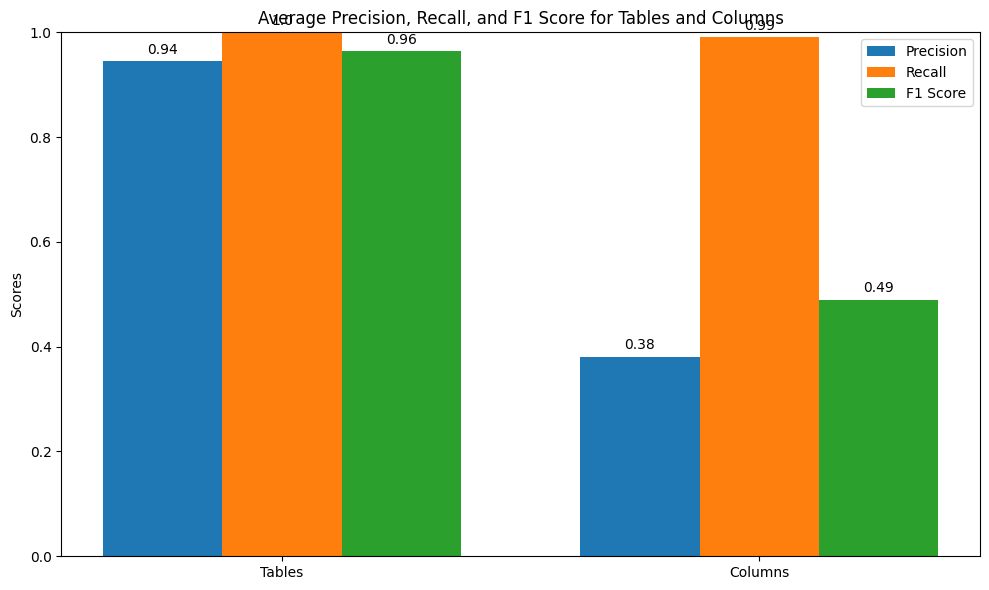

In [11]:
# test with gpt4
model = "gpt-4"
num_samples = 1
make_test(data, model, num_samples)

15it [07:27, 29.85s/it]


Aggregated Metrics: {'table_metrics': {'precision': 0.9444444444444444, 'recall': 1.0, 'f1': 0.9644444444444444}, 'column_metrics': {'precision': 0.3812335073700107, 'recall': 0.9904761904761905, 'f1': 0.4899229616775066}}


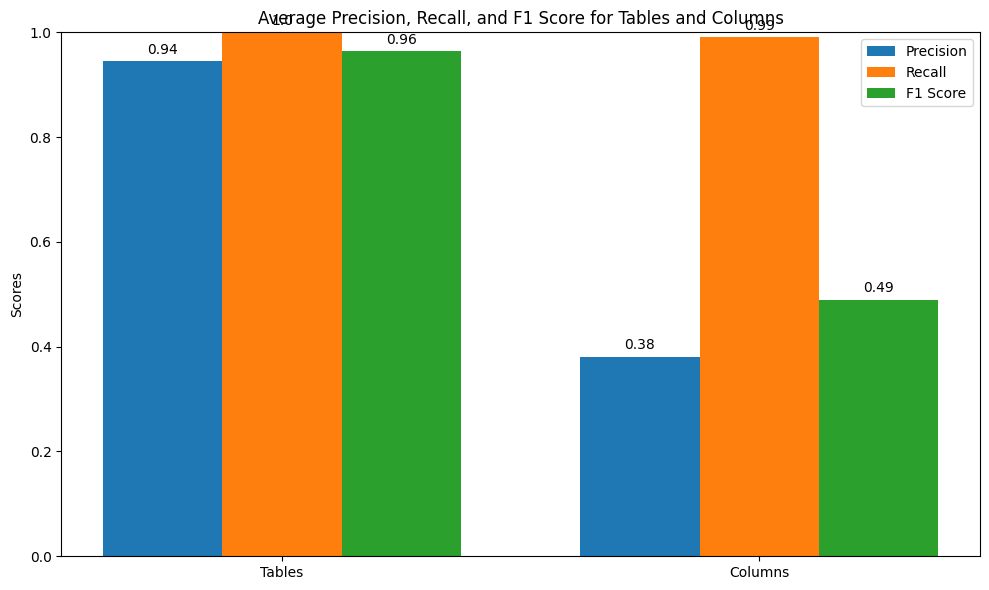

In [13]:
# test with gpt4 and 3 samples 
model = "gpt-4"
num_samples = 3
make_test(data, model, num_samples)

15it [00:58,  3.93s/it]


Aggregated Metrics: {'table_metrics': {'precision': 0.9666666666666667, 'recall': 0.9666666666666667, 'f1': 0.9555555555555555}, 'column_metrics': {'precision': 0.4115916930076995, 'recall': 0.9571428571428572, 'f1': 0.5174784463826805}}


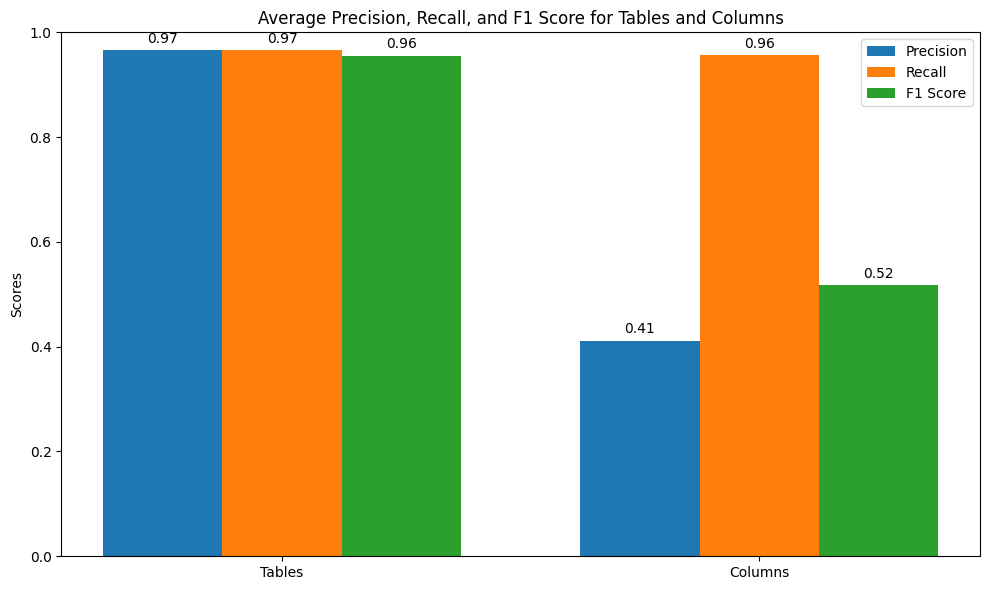

In [14]:
# test with gpt-3.5
model = "gpt-3.5"
num_samples = 1
make_test(data, model, num_samples)

15it [01:18,  5.24s/it]

Aggregated Metrics: {'table_metrics': {'precision': 0.8055555555555556, 'recall': 1.0, 'f1': 0.8644444444444445}, 'column_metrics': {'precision': 0.37937327609801474, 'recall': 1.0, 'f1': 0.4871102503860935}}


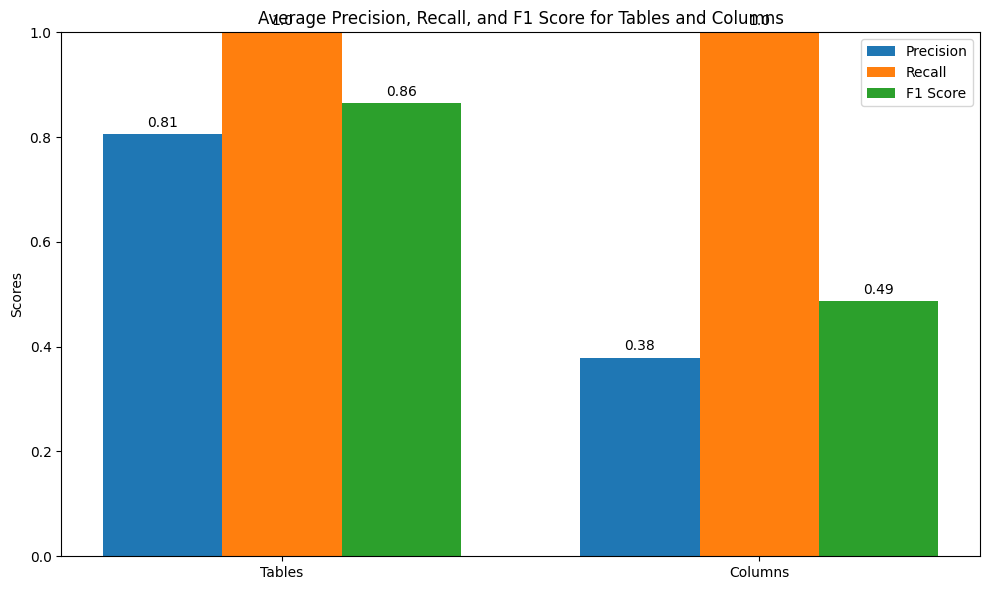

In [15]:
# test with open source Llama-3
model = "llama-3"
num_samples = 1
make_test(data, model, num_samples)

In [2]:
from src.llm.llm_interface import UnifiedLLMInterface

llm = UnifiedLLMInterface()
model = "finetuned-NL2SQL"
prompt="Hello, How are you ?"
llm.generate(model,prompt)

OSError: [WinError 126] Le module spécifié est introuvable. Error loading "C:\Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\.venv\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

## Cost Estimation per task

In [8]:
PROMPT_PATH = os.getenv("PROMPT_ROOT_PATH") + "\\table_selection.txt"
prompt = load_prompt(PROMPT_PATH)

In [9]:
def tokens_calc(example):
    encoding = tiktoken.get_encoding("cl100k_base")
    num_tokens = len(encoding.encode(example))
    return num_tokens

In [10]:
#prompt template tokens 
tokens_calc(prompt)

362

The prompt template has 362 tokens in total, and we have also 3 other variables (Database_Schema,Question and Hint).
After i see a formatted prompt example it contains about 1500 tokens (because database_schema will be long)
So let's suppose that input tokens is 1500

In [11]:
## Output tokens estimation from an example 
output_example = """
{'tentative_schema': {'schools': ['CDSCode',
   'NCESDist',
   'NCESSchool',
   'StatusType',
   'County',
   'District',
   'School',
   'Street',
   'StreetAbr',
   'City',
   'Zip',
   'State',
   'MailStreet',
   'MailStrAbr',
   'MailCity',
   'MailZip',
   'MailState',
   'Phone',
   'Ext',
   'Website',
   'OpenDate',
   'ClosedDate',
   'Charter',
   'CharterNum',
   'FundingType',
   'DOC',
   'DOCType',
   'SOC',
   'SOCType',
   'EdOpsCode',
   'EdOpsName',
   'EILCode',
   'EILName',
   'GSoffered',
   'GSserved',
   'Virtual',
   'Magnet',
   'Latitude',
   'Longitude',
   'AdmFName1',
   'AdmLName1',
   'AdmEmail1',
   'AdmFName2',
   'AdmLName2',
   'AdmEmail2',
   'AdmFName3',
   'AdmLName3',
   'AdmEmail3',
   'LastUpdate'],
  'frpm': ['CDSCode',
   'Academic Year',
   'County Code',
   'District Code',
   'School Code',
   'County Name',
   'District Name',
   'School Name',
   'District Type',
   'School Type',
   'Educational Option Type',
   'NSLP Provision Status',
   'Charter School (Y/N)',
   'Charter School Number',
   'Charter Funding Type',
   'IRC',
   'Low Grade',
   'High Grade',
   'Enrollment (K-12)',
   'Free Meal Count (K-12)',
   'Percent (%) Eligible Free (K-12)',
   'FRPM Count (K-12)',
   'Percent (%) Eligible FRPM (K-12)',
   'Enrollment (Ages 5-17)',
   'Free Meal Count (Ages 5-17)',
   'Percent (%) Eligible Free (Ages 5-17)',
   'FRPM Count (Ages 5-17)',
   'Percent (%) Eligible FRPM (Ages 5-17)',
   '2013-14 CALPADS Fall 1 Certification Status']},
 'chain_of_thought_reasoning': "The question requires finding the school in California with the lowest latitude coordinates and its lowest grade. The hint helps to narrow down the search to schools in California. The database schema provides information about schools, their locations, and their grades. Therefore, we need to use the 'chools' table to find the school with the lowest latitude coordinates. Additionally, we need to use the 'frpm' table to find the lowest grade for the selected school. The 'atscores' table is not necessary for this question.",
 'selected_tables': ['schools', 'frpm']}
"""
tokens_calc(output_example)

642

Let’s suppose the number of tokens in the output is 700

In [12]:
## Price calculation (just with gpt4 because in this module we don't use gpt3.5) 
input_price_per_token_gpt4 = 0.01 / 1000
output_price_per_token_gpt4 = 0.03 / 1000
price_gpt4 = 1500 * input_price_per_token_gpt4 + 700 * output_price_per_token_gpt4
print("estimated price per Task (GPT-4):", price_gpt4, "$")

estimated price per Task (GPT-4): 0.036 $


In [13]:
## in this module there is a number of retrials so let's estimate the price with different number of retrials 

num_retrials = [1, 2, 3, 4, 5]
for num_retrial in num_retrials:
    total_price = price_gpt4 * num_retrial
    print("The estimated price with number of retrials of "+str(num_retrial)+": ",total_price)

The estimated price with number of retrials of 1:  0.036
The estimated price with number of retrials of 2:  0.072
The estimated price with number of retrials of 3:  0.10799999999999998
The estimated price with number of retrials of 4:  0.144
The estimated price with number of retrials of 5:  0.18
